# Polynomial regression: an application of regularization

## Fitting polynomials using least squares
Thus far in this course, we have used the term linear regression to mean "fitting a line to data". In this section, we will see that linear regression can actually be used as a general method to fit functions which are _nonlinear_ functions of the data. In particular, in this section, we will focus on the task of fitting polynomials to data.

To see how this is done, suppose we would like to fit a $p$th order polynomial of the form

$$
f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_p x^p \hspace{10mm} (1)
$$

to some observed data $(x, y)$. Then define the vectors 

$$
\boldsymbol{z}_p(x) = \begin{bmatrix} 1 \\ x \\ x^2 \\\vdots \\ x^p\end{bmatrix}\in\mathbb{R}^{p+1},\;\;\; \boldsymbol{\beta}=\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\\vdots \\ \beta_p\end{bmatrix} \in \mathbb{R}^{p+1}
$$

and observe that the model $(1)$ can be equivalently expressed as

$$
f(x) = \boldsymbol{z}_p(x)\cdot \boldsymbol{\beta}.
$$

Given some data $(x_1,y_1),\dots,(x_n,y_n)$ that we'd like to fit this model, we could define the usual least squares objective as 

$$
\sum_{i=1}^n (y_i - \boldsymbol{z}_p(x_i)\cdot \boldsymbol{\beta})^2 = \|\boldsymbol{y} - \boldsymbol{X}_p \boldsymbol{\beta}\|_2^2
$$

where we've defined the matrix 

$$
\boldsymbol{X}_p = \begin{bmatrix}\boldsymbol{z}_p(x_1)\\ \vdots \\ \boldsymbol{z}_p(x_1)\end{bmatrix} = \begin{bmatrix} 1 & x_1 & x_1^2 & \cdots & x_1^p\\ \vdots & \vdots & \vdots &\vdots & \vdots \\ \vdots & \vdots & \vdots &\vdots & \vdots \\ 1 & x_n & x_n^2 & \cdots & x_n^p\end{bmatrix}
$$

Our problem now looks identical to our usual least squares problem, and we can get the usual solution: $\hat{\boldsymbol{\beta}} = (\boldsymbol{X}_p^\top \boldsymbol{X}_p)^{-1}\boldsymbol{X}_p^\top \boldsymbol{y}$. These coefficients can be plugged back in to get a fitted $p$th order polynomial:

$$
\hat{f}(x) = \hat{\beta}_0 + \hat{\beta}_1 x + \hat{\beta}_2 x^2 + \cdots + \hat{\beta}_p x^p.
$$

This is distinctly _not_ a linear function of the data. Indeed, in this model, each power $x^j$ just acts like an additional feature in our model. The important thing for making the usual least squares problem appear is that it is a linear function of the _parameters_ (i.e. the function $f_{\boldsymbol{\beta}}(x) = \boldsymbol{z}_p(x)\cdot \boldsymbol{\beta}$ is a linear function of $\boldsymbol{\beta}$). Let's see an example to illustrate how this works. First, let's generate some fake data coming from the "true" regression function $f_\star(x) = 4x + 3\cos(2\pi x)$, where $x$ is drawn uniformly at random from $[-1,1]$ and 

$$
y = f_\star(x) + \varepsilon.
$$

We do this in the following cell.

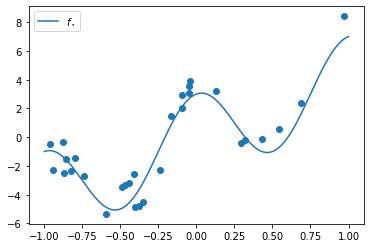

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f_star = lambda x: 4*x + 3*np.cos(2*np.pi*x)

n = 30
x = np.random.uniform(-1,1,size=n)
x_test = np.linspace(-1,1,1000)
y = f_star(x) + np.random.normal(size=n)

plt.scatter(x, y)
plt.plot(x_test, f_star(x_test), label=r"$f_\star$")
plt.legend()
plt.show()

To generate the polynomial feature matrix $\boldsymbol{X}_p$, we define the following function.

In [2]:
def polynomial_features(x, p):
    x = x.reshape(-1,1)
    return np.hstack([x**j for j in range(p+1)])

Now let's try fitting a polynomial to our data.

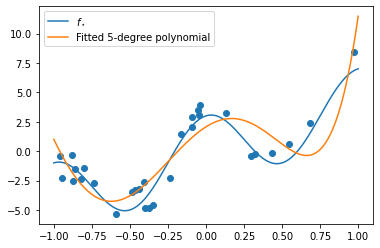

In [3]:
p = 5 # use an order 5 polynomial 
Xp = polynomial_features(x, p=p) # generate feature matrix
beta_hat = np.linalg.inv(Xp.T@Xp)@Xp.T@y # get OLS coefficients

# make predictions on test samples to compare the fitted function
Xp_test = polynomial_features(x_test, p=p)
y_hat_test = Xp_test@beta_hat

plt.scatter(x, y)
plt.plot(x_test, f_star(x_test), label=r"$f_\star$")
plt.plot(x_test, y_hat_test, label="Fitted 5-degree polynomial")
plt.legend()
plt.show()

## Fitting polynomials with more features than examples